In [1]:
import pandas as pd

In [ ]:
df25 = pd.read_csv("data/2025_comptage-velo-donnees-compteurs.csv", on_bad_lines='skip')
df25.head()

,Identifiant du compteur;Nom du compteur;Identifiant du site de comptage;Nom du site de comptage;Comptage horaire;Date et heure de comptage;Date d'installation du site de comptage;Lien vers photo du site de comptage;Coordonnées géographiques;Identifiant technique compteur;ID Photos;test_lien_vers_photos_du_site_de_comptage_;id_photo_1;url_sites;type_dimage;mois_annee_comptage
100003098-101003098;106 avenue Denfert Rochereau NE-SO;100003098;106 avenue Denfert Rochereau;0;2024-11-01T06:00:00+01:00;2012-02-22;https://filer.eco-counter-tools.com/file/09/73f38aaf49fa85ee19ee67277787a24af6b31b497e0fbf06bf2970b4449a0409/Y2H16029278_20200818121425.jpg;48.83507,2.33305;Y2H20114504;https://filer.eco-counter...
100003098-101003098;106 avenue Denfert Rochereau NE-SO;100003098;106 avenue Denfert Rochereau;0;2024-11-01T04:00:00+01:00;2012-02-22;https://filer.eco-counter-tools.com/file/09/73f38aaf49fa85ee19ee67277787a24af6b31b497e0fbf06bf2970b4449a0409/Y2H16029278_20200818121425.jpg;48.83507,2.33305;Y2H20114504;https://filer.eco-counter...
100003098-101003098;106 avenue Denfert Rochereau NE-SO;100003098;106 avenue Denfert Rochereau;0;2024-11-01T07:00:00+01:00;2012-02-22;https://filer.eco-counter-tools.com/file/09/73f38aaf49fa85ee19ee67277787a24af6b31b497e0fbf06bf2970b4449a0409/Y2H16029278_20200818121425.jpg;48.83507,2.33305;Y2H20114504;https://filer.eco-counter...
100003098-101003098;106 avenue Denfert Rochereau NE-SO;100003098;106 avenue Denfert Rochereau;0;2024-11-01T08:00:00+01:00;2012-02-22;https://filer.eco-counter-tools.com/file/09/73f38aaf49fa85ee19ee67277787a24af6b31b497e0fbf06bf2970b4449a0409/Y2H16029278_20200818121425.jpg;48.83507,2.33305;Y2H20114504;https://filer.eco-counter...
100003098-101003098;106 avenue Denfert Rochereau NE-SO;100003098;106 avenue Denfert Rochereau;0;2024-11-01T05:00:00+01:00;2012-02-22;https://filer.eco-counter-tools.com/file/09/73f38aaf49fa85ee19ee67277787a24af6b31b497e0fbf06bf2970b4449a0409/Y2H16029278_20200818121425.jpg;48.83507,2.33305;Y2H20114504;https://filer.eco-counter...


In [ ]:
colsToKeep = [
    # 'Identifiant du compteur',
    # 'Nom du compteur',
    # 'Identifiant du site de comptage',
    'Nom du site de comptage',
    'Comptage horaire',
    'Date et heure de comptage',
    #"Date d'installation du site de comptage",
    #'Lien vers photo du site de comptage',
    'Coordonnées géographiques',
    # 'Identifiant technique compteur',
    # 'ID Photos',
    # 'test_lien_vers_photos_du_site_de_comptage_',
    # 'id_photo_1',
    # 'url_sites',
    # 'type_dimage',
    # 'mois_annee_comptage'
]
df25 = pd.read_csv('data/2025_comptage-velo-donnees-compteurs.csv', sep=";", usecols=colsToKeep, on_bad_lines='skip')
df25.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques
0,106 avenue Denfert Rochereau,0,2024-11-01T06:00:00+01:00,"48.83507, 2.33305"
1,106 avenue Denfert Rochereau,0,2024-11-01T04:00:00+01:00,"48.83507, 2.33305"
2,106 avenue Denfert Rochereau,0,2024-11-01T07:00:00+01:00,"48.83507, 2.33305"
3,106 avenue Denfert Rochereau,0,2024-11-01T08:00:00+01:00,"48.83507, 2.33305"
4,106 avenue Denfert Rochereau,0,2024-11-01T05:00:00+01:00,"48.83507, 2.33305"


In [4]:
df25.shape

(927811, 4)

In [5]:
# Séparer latitude et longitude
df25[['latitude', 'longitude']] = df25['Coordonnées géographiques'].str.split(',', n=1, expand=True)

df25["Date et heure de comptage"] = pd.to_datetime(
    df25["Date et heure de comptage"], 
    utc=True,    # rend les dates tz‑aware (UTC)
    errors='coerce'
)

In [6]:
df25_sortedbyplace = df25.sort_values(by=["Nom du site de comptage","Date et heure de comptage"])
df25_sortedbyplace.head()

,Nom du site de comptage,Comptage horaire,Date et heure de comptage,Coordonnées géographiques,latitude,longitude
115171,10 avenue de la Grande Armée,0,2025-01-07 10:00:00+00:00,"48.8748, 2.2924",48.8748,2.2924
114831,10 avenue de la Grande Armée,13,2025-01-07 11:00:00+00:00,"48.8748, 2.2924",48.8748,2.2924
114834,10 avenue de la Grande Armée,50,2025-01-07 12:00:00+00:00,"48.8748, 2.2924",48.8748,2.2924
115174,10 avenue de la Grande Armée,54,2025-01-07 13:00:00+00:00,"48.8748, 2.2924",48.8748,2.2924
115481,10 avenue de la Grande Armée,33,2025-01-07 14:00:00+00:00,"48.8748, 2.2924",48.8748,2.2924


In [7]:
cols = ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude"]
df25_sites = df25[cols].drop_duplicates(subset=["Nom du site de comptage"])
print(df25_sites.shape)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df25_sites

(66, 4)


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude
0,106 avenue Denfert Rochereau,"48.83507, 2.33305",48.83507,2.33305
9564,135 avenue Daumesnil,"48.843435, 2.383378",48.843435,2.383378
19135,28 boulevard Diderot,"48.84613, 2.37559",48.84613,2.37559
38007,39 quai François Mauriac,"48.83436, 2.377",48.83436,2.377
57036,18 quai de l'Hôtel de Ville,"48.85372, 2.35702",48.85372,2.35702
76434,27 boulevard Diderot,"48.846099, 2.375456",48.846099,2.375456
85950,Voie Georges Pompidou,"48.84837, 2.27596",48.84837,2.27596
105018,67 boulevard Voltaire,"48.86149, 2.37376",48.86149,2.37376
114831,10 avenue de la Grande Armée,"48.8748, 2.2924",48.8748,2.2924
122829,7 avenue de la Grande Armée,"48.87474, 2.29219",48.87474,2.29219


In [8]:
import geopandas as gpd

# 1. Copie du DataFrame de base
df = df25_sites.copy()

# 2. Nettoyage des coordonnées
df['latitude']  = pd.to_numeric(df['latitude'],  errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

df = df.dropna(subset=['latitude', 'longitude'])

# 3. Création d’un GeoDataFrame à partir du DataFrame nettoyé
gdf_sites = gpd.GeoDataFrame(
    df,
    geometry = gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

# 4. Chargement et projection des arrondissements
url_geojson = "https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr"
gdf_arr = gpd.read_file(url_geojson)
gdf_arr = gdf_arr.to_crs(epsg=4326)

# 5. Spatial join — points dans les polygones
gdf_joined = gpd.sjoin(gdf_sites, gdf_arr, how="left", predicate="within")

# 6. Sélection & renommage des colonnes d’intérêt
df25_final = gdf_joined[
    ["Nom du site de comptage", "Coordonnées géographiques", "latitude", "longitude", "l_ar"]
].rename(columns={"l_ar": "arrondissement"})

df25_final


,Nom du site de comptage,Coordonnées géographiques,latitude,longitude,arrondissement
0,106 avenue Denfert Rochereau,"48.83507, 2.33305",48.835070,2.333050,14ème Ardt
9564,135 avenue Daumesnil,"48.843435, 2.383378",48.843435,2.383378,12ème Ardt
19135,28 boulevard Diderot,"48.84613, 2.37559",48.846130,2.375590,12ème Ardt
38007,39 quai François Mauriac,"48.83436, 2.377",48.834360,2.377000,13ème Ardt
57036,18 quai de l'Hôtel de Ville,"48.85372, 2.35702",48.853720,2.357020,4ème Ardt
76434,27 boulevard Diderot,"48.846099, 2.375456",48.846099,2.375456,12ème Ardt
85950,Voie Georges Pompidou,"48.84837, 2.27596",48.848370,2.275960,16ème Ardt
105018,67 boulevard Voltaire,"48.86149, 2.37376",48.861490,2.373760,11ème Ardt
114831,10 avenue de la Grande Armée,"48.8748, 2.2924",48.874800,2.292400,17ème Ardt
122829,7 avenue de la Grande Armée,"48.87474, 2.29219",48.874740,2.292190,17ème Ardt


In [9]:
import pandas as pd

def list_to_semicolon_str(lst):
    return "; ".join(str(v) for v in lst if pd.notna(v))

# Regroupement par arrondissement et concaténation des coordonnées
tableau_arr = (
    df25_final
    .groupby("arrondissement", dropna=False)
    .agg({
        "Coordonnées géographiques": lambda x: list_to_semicolon_str(x),
        "latitude": lambda x: list_to_semicolon_str(x),
        "longitude": lambda x: list_to_semicolon_str(x)
    })
    .reset_index()
)

# Trier les arrondissements par numéro — si le nom contient un nombre
# On extrait le premier nombre trouvé dans la chaîne (ex “12e”, “8”, etc.)
tableau_arr['arr_num'] = (
    tableau_arr['arrondissement']
    .str.extract(r'(\d+)', expand=False)  # capture les chiffres
    .astype(float, errors='ignore')       # convertit en float si possible
)

# Trier par ce numéro, en mettant les NaN (arrondissements sans numéro numérique) à la fin
tableau_arr = tableau_arr.sort_values(
    by='arr_num', na_position='last'
).drop(columns='arr_num').reset_index(drop=True)

# Optionnel : afficher tout, mais attention si le tableau est très long
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

tableau_arr


,arrondissement,Coordonnées géographiques,latitude,longitude
0,1er Ardt,"48.8635, 2.32239",48.8635,2.32239
1,2ème Ardt,"48.86377, 2.35096",48.86377,2.35096
2,3ème Ardt,"48.86502, 2.35387",48.86502,2.35387
3,4ème Ardt,"48.85372, 2.35702; 48.85735, 2.35211",48.85372; 48.85735,2.35702; 2.35211
4,5ème Ardt,"48.85013, 2.35423",48.85013,2.35423
5,7ème Ardt,"48.86179, 2.32014; 48.86279, 2.31055; 48.86281, 2.31037; 48.8629, 2.3118",48.86179; 48.86279; 48.86281; 48.8629,2.32014; 2.31055; 2.31037; 2.3118
6,8ème Ardt,"48.86999, 2.30743; 48.86999, 2.30722; 48.86373, 2.31973; 48.86462, 2.31444",48.86999; 48.86999; 48.86373; 48.86462,2.30743; 2.30722; 2.31973; 2.31444
7,10ème Ardt,"48.87756, 2.35535; 48.87769, 2.35475",48.87756; 48.87769,2.35535; 2.35475
8,11ème Ardt,"48.86149, 2.37376; 48.86155, 2.37407; 48.86081, 2.37301; 48.86089, 2.37212; 48.860528, 2.388364",48.86149; 48.86155; 48.86081; 48.86089; 48.860528,2.37376; 2.37407; 2.37301; 2.37212; 2.388364
9,12ème Ardt,"48.843435, 2.383378; 48.84613, 2.37559; 48.846099, 2.375456; 48.829523, 2.38699; 48.830331, 2.400551; 48.83848, 2.37587; 48.8402, 2.40889; 48.834624, 2.405283",48.843435; 48.84613; 48.846099; 48.829523; 48.830331; 48.83848; 48.8402; 48.834624,2.383378; 2.37559; 2.375456; 2.38699; 2.400551; 2.37587; 2.40889; 2.405283


In [10]:
df25.shape

(927811, 6)

In [11]:
df25["Date et heure de comptage"] = pd.to_datetime(df25["Date et heure de comptage"], utc=True)
df25["Date et heure de comptage"] = df25["Date et heure de comptage"].dt.tz_convert("Europe/Paris")
date_min = df25["Date et heure de comptage"].min()
date_max = df25["Date et heure de comptage"].max()

print("Date la plus ancienne :", date_min)
print("Date la plus récente :", date_max)

Date la plus ancienne : 2024-11-01 04:00:00+01:00
Date la plus récente : 2025-12-06 23:00:00+01:00


In [12]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2025
mois = [f"2025-{m:02d}" for m in range(1, 12)]


results_temp = []

# Groupement par arrondissement (issu de df25_final)
for arr, df_arr in df25_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_temp = []

        # Boucle sur les sites de l’arrondissement
        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=apparent_temperature"
                    "&timezone=Europe/Paris"
                )

                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Sécurité si données manquantes
                if "hourly" in data and "apparent_temperature" in data["hourly"]:
                    toutes_temp.extend(data["hourly"]["apparent_temperature"])

            except Exception as e:
                print(f"❌ Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = (
            sum(toutes_temp) / len(toutes_temp)
            if toutes_temp else None
        )

    results_temp.append(lignes_arr)

# DataFrame final
df25_temp_mensuel = pd.DataFrame(results_temp)

# Tri par numéro d’arrondissement
df25_temp_mensuel["arr_num"] = (
    df25_temp_mensuel["arrondissement"]
    .str.extract(r"(\d+)")
    .astype(float)
)

df25_temp_mensuel = (
    df25_temp_mensuel
    .sort_values("arr_num", na_position="last")
    .drop(columns="arr_num")
    .reset_index(drop=True)
)

# Sauvegarde locale
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2025_temperature_mensuelle_moyenne_par_arrondissement.csv"
)

df25_temp_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")


# Affichage
with pd.option_context(
    'display.max_columns', None,
    'display.max_colwidth', None,
    'display.width', None
):
    print(df25_temp_mensuel)


KeyboardInterrupt: 

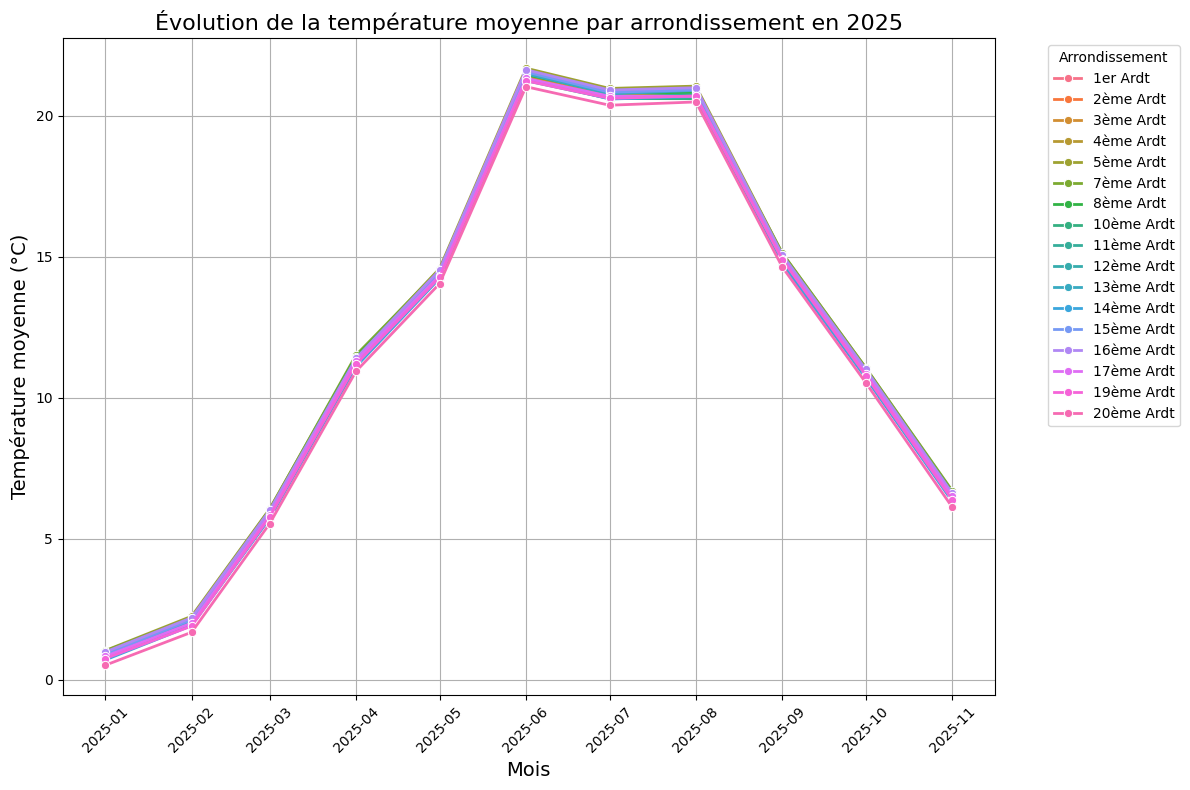

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2025_temperature_mensuelle_moyenne_par_arrondissement.csv"
df25_temp_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df25_long = df25_temp_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="temperature_moyenne_°C"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df25_long["mois"] = pd.to_datetime(df25_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df25_long,
    x="mois",
    y="temperature_moyenne_°C",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la température moyenne par arrondissement en 2025', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Température moyenne (°C)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [14]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2025
mois = [f"2025-{m:02d}" for m in range(1, 12)]

results_precip = []

for arr, df_arr in df25_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_precip = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=precipitation"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                # Vérifie que la clé existe et étend la liste
                if "hourly" in data and "precipitation" in data["hourly"]:
                    toutes_precip.extend(data["hourly"]["precipitation"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        # Somme des précipitations du mois (total pour l'arrondissement)
        lignes_arr[periode] = sum(toutes_precip) if toutes_precip else None

    results_precip.append(lignes_arr)

df25_precip_mensuel = pd.DataFrame(results_precip)
df25_precip_mensuel["arr_num"] = df25_precip_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df25_precip_mensuel = df25_precip_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2025_precipitations_mensuelles_moyennes_par_arrondissement.csv"
)

df25_precip_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df25_precip_mensuel)  # ou df25_precip_mensuel selon nom variable

✅ Data sauvegardée dans data/2025_precipitations_mensuelles_moyennes_par_arrondissement.csv
   arrondissement  2025-01  2025-02  2025-03  2025-04  2025-05  2025-06  \
9        1er Ardt    136.7     50.3     22.4     29.3     56.7     58.0   
11      2ème Ardt    136.7     50.3     22.4     29.3     56.7     58.0   
12      3ème Ardt    136.7     50.3     22.4     29.3     56.7     58.0   
13      4ème Ardt    264.0    100.4     52.8     65.6     98.4    103.8   
14      5ème Ardt    132.0     50.2     26.4     32.8     49.2     51.9   
15      7ème Ardt    546.8    201.2     89.6    117.2    226.8    232.0   
16      8ème Ardt    546.8    201.2     89.6    117.2    226.8    232.0   
0      10ème Ardt    273.4    100.6     44.8     58.6    113.4    116.0   
1      11ème Ardt    677.5    245.0     97.5    163.5    203.5    305.5   
2      12ème Ardt   1088.8    365.6    170.4    300.0    300.0    623.2   
3      13ème Ardt   1340.5    479.5    238.5    351.5    433.5    649.0   
4      1

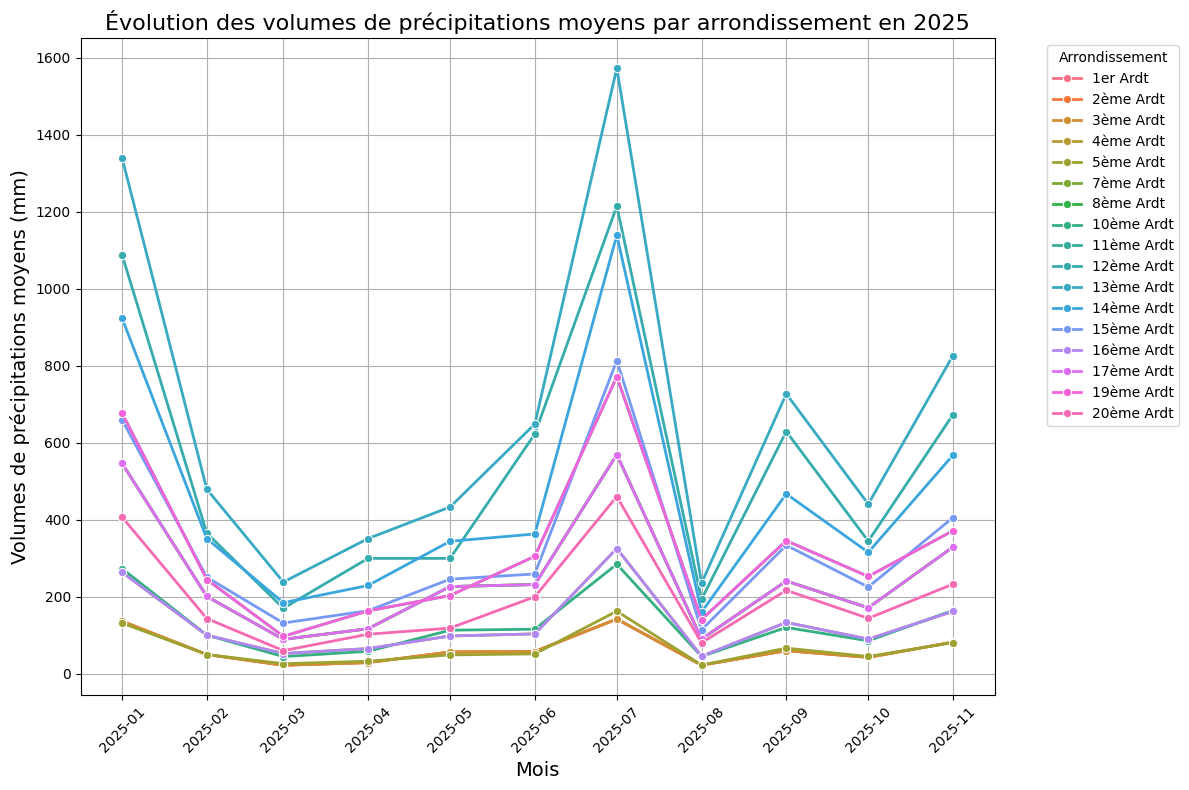

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2025_precipitations_mensuelles_moyennes_par_arrondissement.csv"
df25_precip_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df25_long = df25_precip_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="volumes_precipitations_moyens_mm"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df25_long["mois"] = pd.to_datetime(df25_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df25_long,
    x="mois",
    y="volumes_precipitations_moyens_mm",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution des volumes de précipitations moyens par arrondissement en 2025', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Volumes de précipitations moyens (mm)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import requests
import pandas as pd
import calendar
import os

def dernier_jour_du_mois(annee, mois):
    return calendar.monthrange(annee, mois)[1]

 # Mois de l'année 2025
mois = [f"2025-{m:02d}" for m in range(1, 12)]

results_cloud = []

for arr, df_arr in df25_final.groupby("arrondissement"):
    lignes_arr = {"arrondissement": arr}

    for periode in mois:
        an, m = map(int, periode.split("-"))
        start = f"{an}-{m:02d}-01"
        end   = f"{an}-{m:02d}-{dernier_jour_du_mois(an, m)}"

        toutes_cloud = []

        for _, row in df_arr.iterrows():
            lat = float(row["latitude"])
            lon = float(row["longitude"])

            try:
                url = (
                    f"https://archive-api.open-meteo.com/v1/archive?"
                    f"latitude={lat}&longitude={lon}"
                    f"&start_date={start}&end_date={end}"
                    "&hourly=cloud_cover"
                    "&timezone=Europe/Paris"
                )
                resp = requests.get(url)
                resp.raise_for_status()
                data = resp.json()

                if "hourly" in data and "cloud_cover" in data["hourly"]:
                    toutes_cloud.extend(data["hourly"]["cloud_cover"])
            except Exception as e:
                print(f"Erreur pour {arr}, {periode}, site {lat},{lon} : {e}")

        lignes_arr[periode] = sum(toutes_cloud)/len(toutes_cloud) if toutes_cloud else None

    results_cloud.append(lignes_arr)

df25_cloud_mensuel = pd.DataFrame(results_cloud)
df25_cloud_mensuel["arr_num"] = df25_cloud_mensuel["arrondissement"].str.extract(r"(\d+)").astype(int)
df25_cloud_mensuel = df25_cloud_mensuel.sort_values("arr_num").drop(columns="arr_num")

# — Sauvegarde locale du résultat —
# Sauvegarde locale dans le dossier data (déjà existant)
csv_path = os.path.join(
    "data",
    "2025_cloudcover_mensuel_moyen_par_arrondissement.csv"
)

df25_cloud_mensuel.to_csv(csv_path, index=False)
print(f"✅ Data sauvegardée dans {csv_path}")

print(df25_cloud_mensuel)


✅ Data sauvegardée dans data/2025_cloudcover_mensuel_moyen_par_arrondissement.csv
   arrondissement    2025-01    2025-02    2025-03    2025-04    2025-05  \
9        1er Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
11      2ème Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
12      3ème Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
13      4ème Ardt  77.466398  70.752976  51.118280  43.637500  56.375000   
14      5ème Ardt  77.466398  70.752976  51.118280  43.637500  56.375000   
15      7ème Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
16      8ème Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
0      10ème Ardt  77.008065  71.101190  50.447581  44.216667  56.737903   
1      11ème Ardt  76.217742  71.077381  50.567204  45.009722  56.477151   
2      12ème Ardt  77.022849  70.944940  51.444892  44.080556  56.166667   
3      13ème Ardt  77.244624  70.848958  51.281586  43.859028  56.270833   
4     

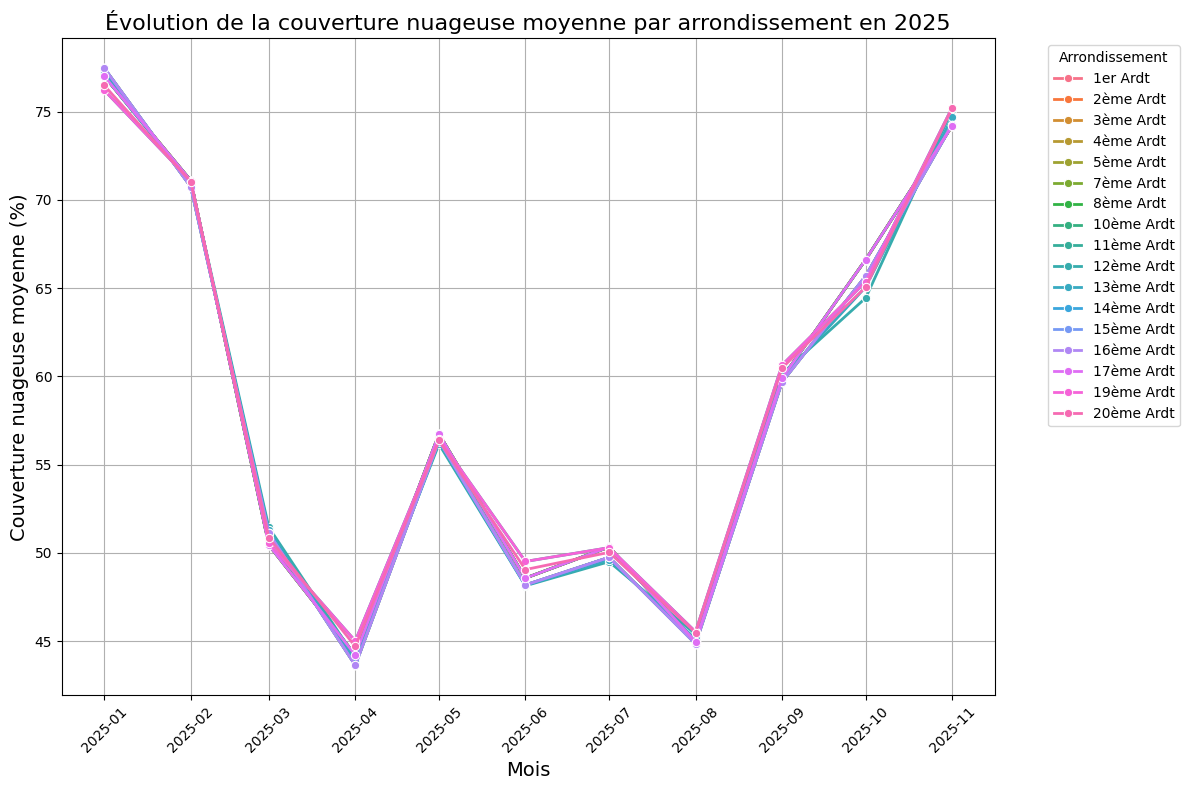

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Charger la sauvegarde locale
csv_path = "data/2025_cloudcover_mensuel_moyen_par_arrondissement.csv"
df25_cloud_mensuel = pd.read_csv(csv_path)

# 2) Transformer en format long pour le tracé
df25_long = df25_cloud_mensuel.melt(
    id_vars=["arrondissement"],
    var_name="mois",
    value_name="couverture_nuageuse_moyenne_%"
)

# 3) Convertir la colonne 'mois' en datetime (début de mois)
df25_long["mois"] = pd.to_datetime(df25_long["mois"], format="%Y-%m")

# 4) Tracer le graphique
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df25_long,
    x="mois",
    y="couverture_nuageuse_moyenne_%",
    hue="arrondissement",   # une ligne par arrondissement
    marker="o",
    lw=2
)
plt.title('Évolution de la couverture nuageuse moyenne par arrondissement en 2025', fontsize=16)
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Couverture nuageuse moyenne (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Arrondissement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
